# Imports

In [116]:
%run Imports.ipynb

# Data

In [117]:
path = "../Data/Deutschland/"
path_rml_yt = path + "RML_YouTube/"
path_rml_web = path + "Robert_Marc_Lehmann_Websuche/"
path_zoos_web = path + "Zoos_Websuche/"
path_zoos_yt = path + "Zoos_YouTubesuche/"
path_vdz_web = path + "Verband der Zoologischen Gärten/"

In [118]:
file = 'multiTimeline.csv'

In [119]:
rml_yt = pd.read_csv(path_rml_yt + file, skiprows=1)
rml_yt

,Monat,Robert Marc Lehmann: (Deutschland)
0,2017-01,0
1,2017-02,0
2,2017-03,0
3,2017-04,0
4,2017-05,0
...,...,...
92,2024-09,15
93,2024-10,42
94,2024-11,53
95,2024-12,22


In [120]:
df = pd.read_csv(path + 'combined_timeseries.csv')
df['Monat'] = pd.to_datetime(df['Monat'])
df.head()

,Monat,RML Websuche,Zoos Web,Zoos YT,VdZ Web,RML_YT
0,2017-01-01,0,11,0,0,0
1,2017-02-01,0,15,0,0,0
2,2017-03-01,0,18,0,0,0
3,2017-04-01,0,23,0,0,0
4,2017-05-01,0,15,0,0,0


## Recombine files

In [121]:
# rml_yt = pd.read_csv(path_rml_yt + file, skiprows=1)
# rml_web = pd.read_csv(path_rml_web + file, skiprows=1)
# zoos_web = pd.read_csv(path_zoos_web + file, skiprows=1)
# zoos_yt = pd.read_csv(path_zoos_yt + file, skiprows=1)
# vdz_web = pd.read_csv(path_vdz_web + file, skiprows=1)

In [122]:
# print(rml_yt.columns)
# print(zoos_web.columns)
# print(zoos_yt.columns)
# print(vdz_web.columns)

In [123]:
# df = rml_web.copy()
# df = df.rename(columns={"Robert Marc Lehmann: (Deutschland)": "RML Websuche"})
# df['Zoos Web'] = zoos_web["zoos: (Deutschland)"]
# df['Zoos YT'] = zoos_yt["zoos: (Deutschland)"]
# df['VdZ Web'] = vdz_web["Verband der Zoologischen Gärten: (Deutschland)"]
# df.head()

In [124]:
# df['RML_YT'] = rml_yt['Robert Marc Lehmann: (Deutschland)']
# df.head()

In [125]:
# df.to_csv(path + 'combined_timeseries.csv', index=False)

# Some cleaning

In [126]:
df['RML_YT'] = df['RML_YT'].astype(str)

In [127]:
for i in range(len(df)):
    # print(df['Monat'][i], df['RML_YT'][i])
    if df['RML_YT'][i] == '<1':
        print(df['Monat'][i], df['RML_YT'][i])
        df['RML_YT'][i] = 0
        print(df['Monat'][i], df['RML_YT'][i])

In [128]:
df['RML_YT'] = df['RML_YT'].astype(int)

In [129]:
df.to_csv(path + 'combined_timeseries.csv', index=False)

# EDA

In [130]:
df.head()

,Monat,RML Websuche,Zoos Web,Zoos YT,VdZ Web,RML_YT
0,2017-01-01,0,11,0,0,0
1,2017-02-01,0,15,0,0,0
2,2017-03-01,0,18,0,0,0
3,2017-04-01,0,23,0,0,0
4,2017-05-01,0,15,0,0,0


In [131]:
df.describe()

,Monat,RML Websuche,Zoos Web,Zoos YT,VdZ Web,RML_YT
count,97,97.000000,97.000000,97.000000,97.000000,97.000000
mean,2020-12-30 22:30:55.670103040,15.268041,19.288660,22.907216,16.649485,12.845361
min,2017-01-01 00:00:00,0.000000,8.000000,0.000000,0.000000,0.000000
25%,2019-01-01 00:00:00,1.000000,14.000000,0.000000,0.000000,0.000000
50%,2021-01-01 00:00:00,6.000000,18.000000,20.000000,18.000000,0.000000
75%,2023-01-01 00:00:00,23.000000,22.000000,38.000000,27.000000,22.000000
max,2025-01-01 00:00:00,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,18.972851,11.119576,23.083671,19.599661,19.313931


# Plots

## Websuche

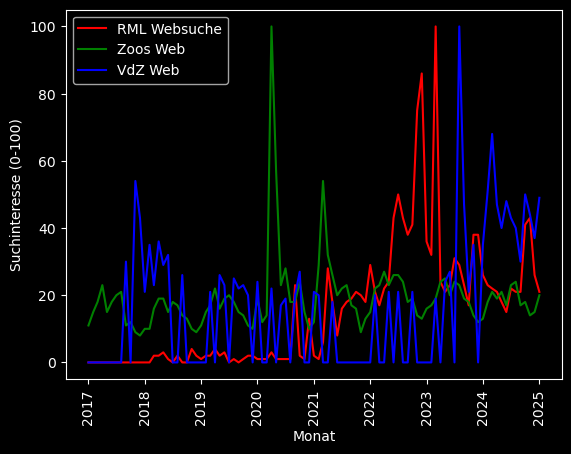

In [132]:
sns.lineplot(data=df, x='Monat', y='RML Websuche', label='RML Websuche', color='red')
sns.lineplot(data=df, x='Monat', y='Zoos Web', label='Zoos Web', color='green')
sns.lineplot(data=df, x='Monat', y='VdZ Web', label='VdZ Web', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Monat')
plt.ylabel('Suchinteresse (0-100)')
plt.show()

## YouTube

In [133]:
df.columns

Index(['Monat', 'RML Websuche', 'Zoos Web', 'Zoos YT', 'VdZ Web', 'RML_YT'], dtype='object')

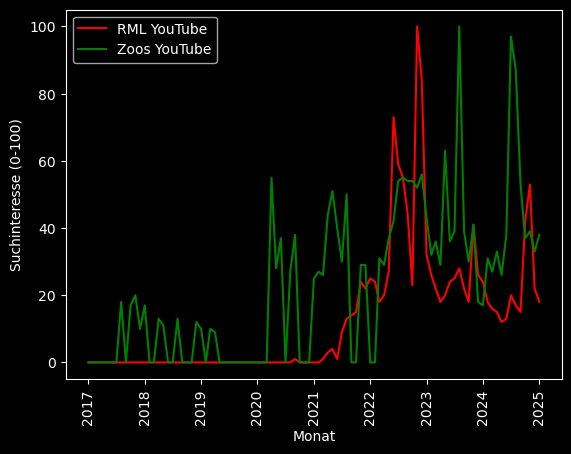

In [134]:
sns.lineplot(data=df, x='Monat', y='RML_YT', label='RML YouTube', color='red')
sns.lineplot(data=df, x='Monat', y='Zoos YT', label='Zoos YouTube', color='green')
plt.xticks(rotation=90)
plt.xlabel('Monat')
plt.ylabel('Suchinteresse (0-100)')
plt.show()

# Korrelationen

In [135]:
corr = df.corr()
corr = corr.round(2)
corr = corr.drop('Monat', axis=0)
corr = corr.drop('Monat', axis=1)


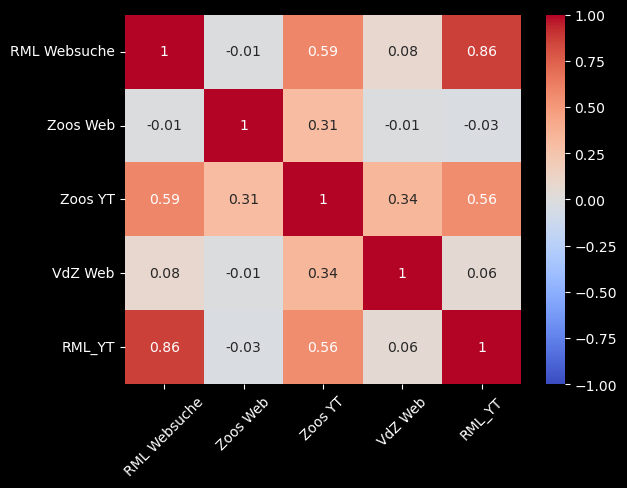

In [136]:
# 2017 - 2024
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

In [137]:
# 2021 - 2024
corr_2021 = df[48:].corr()
corr_2021 = corr_2021.round(2)
corr_2021 = corr_2021.drop('Monat', axis=0)
corr_2021 = corr_2021.drop('Monat', axis=1)

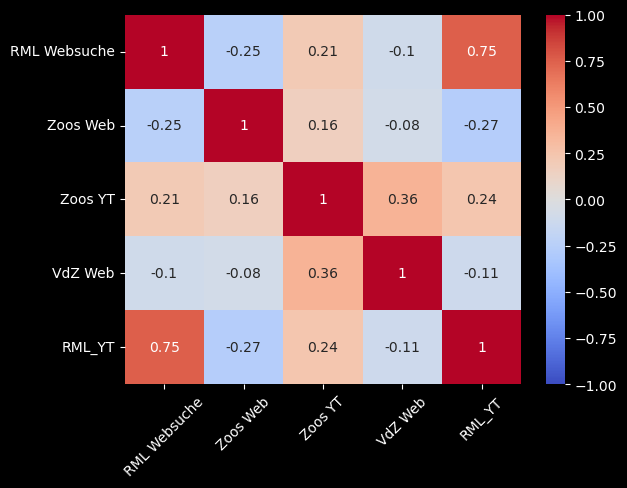

In [138]:
sns.heatmap(corr_2021, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()